In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# En 2D

In [2]:
# Origen
x0, z0 = 5, 0
P = 4                    # Profundidad medida desde la superficie (desde el origen es Z-z0)
a = P - z0               # Profundidad de la capa desde el origen 
v1, v2 = 1.5, 3          # Velocidad en km/s de la capa y el semiespacio
de = 0.1                 # Espacio entre puntos
L_x, P_z = 20, 10         # Dimensiones del dominio horizontal y vertical
x=np.arange(0,L_x+de,de) # Dominio horizontal
z=np.arange(0,P_z+de,de) # Dominio vertical
[Z,X]=np.meshgrid(z,x)  # Malla

b=abs(Z-P)               # Profundidad medida desde la interfaz
c=abs(X-x0)              # Distancia horizontal al origen

Se reescribe la ley de Snell de la siguiente manera:
\begin{equation}
    (v_2^2-v_1^2)x^4-2c(v_2^2-v_1^2)x^3+(c^2(v_2^2-v_1^2)-a^2v_1^2+b^2v_2^2)x^2+2a^2cv_1^2x-c^2a^2v_1^2=0
\end{equation} 

de manera que se obtiene una ecuación de cuarto grado de la forma: $Ax^4+Bx^3+Cx^2+Dx+E=0$
Que sabemos tiene soluciónpor el teorema de Abel-Ruffini.

In [3]:
# Coeficientes de la ecuación de cuarto grado
A=v2**2-v1**2+0j
B=-2*c*A
C=c**2*A-a**2*v1**2+b**2*v2**2
D=2*a**2*c*v1**2+0j
E=-c**2*a**2*v1**2+0j

if a<0:
    a = abs(P - z0)          # Profundidad de la capa desde el origen 
    v1,v2=v2,v1             # Velocidad en km/s de la capa y el semiespacio
    A=-(v2**2-v1**2+0j)
    B=-2*c*A
    C=c**2*A+a**2*v1**2-b**2*v2**2
    D=-2*a**2*c*v1**2+0j
    E=c**2*a**2*v1**2+0j

P1=-B/(4*A)
P2=1/2*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3))                                 
P3=1/2*np.sqrt(B**2/(2*A**2) - 4*C/(3*A) - 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) - 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3)-(-B**3/A**3 + 4*B*C/A**2 - 8*D/A)/(4*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*((2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2)))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3))))
P4=1/2*np.sqrt(B**2/(2*A**2) - 4*C/(3*A) - 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) - 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3)+(-B**3/A**3 + 4*B*C/A**2 - 8*D/A)/(4*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*((2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2)))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)))) 
 
# Se obtienen las 4 raices de la ecuación con las formulas del anexo    
xr1=P1-P2-P3
xr2=P1-P2+P3
xr3=P1+P2-P4
xr4=P1+P2+P4

xr=np.zeros(shape=(len(x),len(z)),dtype='object')
for i in range(len(z)):
    for j in range(len(x)):
        a1=[xr1[j][i],xr2[j][i],xr3[j][i],xr4[j][i]]
        a1=np.array(a1)
        ind=np.where(a1>=0+0j)
        if len(ind[0])!=0:
            xrp=a1[np.where(a1>=0)][0]
            xr[j][i]=xrp
        else:
            xr[j][i]=0

# Punto de refracción en la interfaz            
xr=np.array(xr, dtype=float)

C:\Users\CESAR\AppData\Local\Temp\ipykernel_15796\2653499128.py:18: RuntimeWarning: invalid value encountered in divide
  P2=1/2*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3))
C:\Users\CESAR\AppData\Local\Temp\ipykernel_15796\2653499128.py:19: RuntimeWarning: invalid value encountered in divide
  P3=1/2*np.sqrt(B**2/(2*A**2) - 4*C/(3*A) - 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) - 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**

In [4]:
################################### Tiempos de arribo a los puntos de la malla

# Tiempo directo
t1=np.sqrt((X-x0)**2+(Z-z0)**2) / v1  

# Tiempo refractado
t3=(xr**2+a**2)**(0.5)/v1 + ((c-xr)**2+b**2)**(0.5)/v2  
    
theta_c=np.arcsin(v1/v2)
R=a*np.tan(theta_c) 
b=a-Z+z0 #Z-z0=a-b
c=b*np.tan(theta_c)
xc=abs(X-x0)-R-c 

# Tiempo refractado criticamente
t2=np.sqrt(R**2+a**2) / v1 + xc / v2 + np.sqrt(c**2+b**2) / v1 

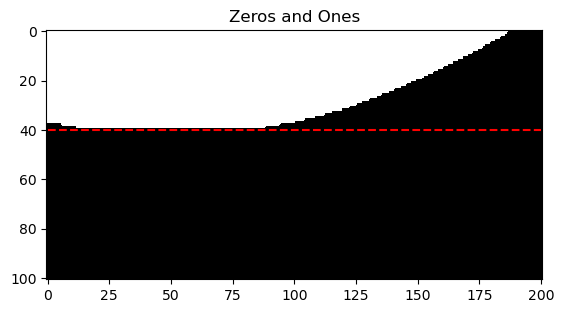

In [5]:
data_cu=np.zeros(shape=(len(z),len(x))) # Matriz para ver puntos donde la onda refractada llegó antes

# Se toma el menor tiempo de arribo a cada punto de la malla
t4=np.empty(shape=(len(x),len(z)),dtype='object')
for j in range(len(x)):
    for i in range(len(z)):
        if P-z0>0:
            if i<int(P/de): 
                t4[j][i]=t1[j][i]
                data_cu[i][j]=1
                if abs(X-x0)[j][i]>=R: 
                    t1_e=t1[j][i]
                    t2_e=t2[j][i] # Arriba del plano es el refractado criticamente
                    t4[j][i]=min(t1_e,t2_e)
                    if min(t1_e,t2_e)==t2_e:
                        data_cu[i][j]=0
            else:
                t4[j][i]=t3[j][i] # Debajo del plano es el refractado
                data_cu[i][j]=0
        elif P-z0<0:
            if i>int(P/de): 
                t4[j][i]=t1[j][i]
                data_cu[i][j]=1
                if abs(X-x0)[j][i]>=R: 
                    t1_e=t1[j][i]
                    t2_e=t2[j][i] # Arriba del plano es el refractado criticamente
                    t4[j][i]=min(t1_e,t2_e)
                    if min(t1_e,t2_e)==t2_e:
                        data_cu[i][j]=0
            else:
                t4[j][i]=t3[j][i] # Debajo del plano es el refractado
                data_cu[i][j]=0
        
# Variable para graficar        
T=np.reshape(t4,(len(x),len(z)),'F') 
T=np.array(T, dtype=float)

# Matriz de ceros y unos para ver puntos donde la onda refractada llegó antes
data_cu=np.array(data_cu, dtype=float)
# Se define el colormap para graficar la matriz
cmapmine = ListedColormap(['k', 'w'], N=2)

# Se grafica data_cu
fig2=plt.figure(2)
ax2=fig2.add_subplot(111)
ax2.imshow(data_cu, cmap=cmapmine, vmin=0, vmax=1)
plt.plot(10*x,10*P*np.ones(len(x)),'r--')
ax2.set_title('Zeros and Ones')
ax2.set_aspect('equal', adjustable='box')
plt.show()

C:\Users\CESAR\AppData\Local\Temp\ipykernel_15796\1604713641.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, fraction=0.03, pad=0.1, label='Tiempo (s)')


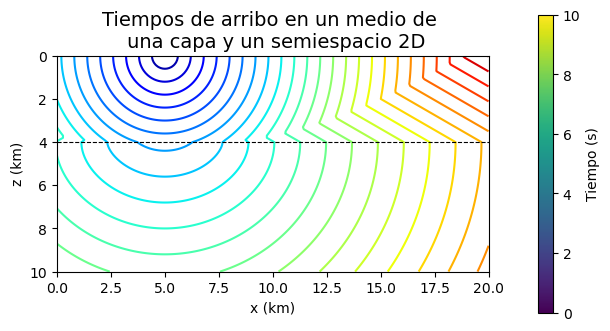

In [6]:
# Grafica
fig=plt.figure(1)
ax =fig. add_subplot(111)
cs=plt.contour(X,Z,T,30)  
plt.plot(x,P*np.ones(len(x)),'k--',linewidth=0.8)
ax.set_title('Tiempos de arribo en un medio de \n una capa y un semiespacio 2D',fontsize=14)
ax.set_xlabel(r'x (km)', fontsize=10)
ax.set_ylabel(r'z (km)', fontsize=10)
ax.invert_yaxis()
ax.set_aspect('equal', adjustable='box')
norm= mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
sm.set_array([])
fig.colorbar(sm, fraction=0.03, pad=0.1, label='Tiempo (s)')
plt.set_cmap('jet')
plt.savefig('GrafMed1CapaySemiesp2D.png')
plt.show()

In [7]:
R

2.3094010767585034

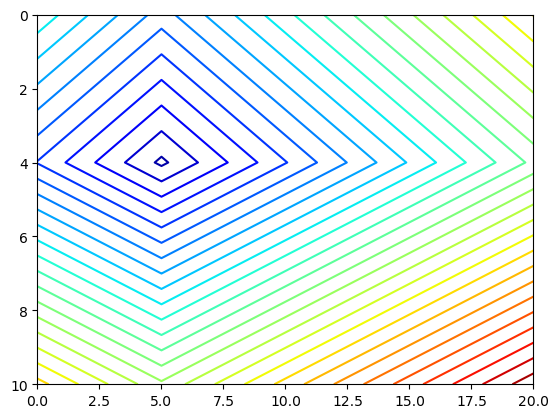

In [8]:
D=np.reshape(t2,(len(x),len(z)),'F') 
D=np.array(D, dtype=float)

fig=plt.figure(10)
ax =fig.add_subplot(111)
plt.contour(X,Z,D,30,cmap='jet')  
ax.invert_yaxis()

# En 3D

In [9]:
# Origen
x0, y0, z0 =5, 7, 0
P = 3                            # Profundidad medida desde la superficie (desde el origen es Z-z0)
a = P - z0                       # Profundidad de la capa desde el origen 
v1, v2 = 1.5, 3                  # Velocidad en km/s de la capa y el semiespacio           
de=0.2                           # Espacio entre puntos
L_x, L_y, P_z = 10, 10, 10        # Dimensiones del dominio horizontal y vertical
x=np.arange(0,L_x+de,de)         # Dominio horizontal en x
y=np.arange(0,L_y+de,de)         # Dominio horizontal en y
z=np.arange(0,P_z+de,de)         # Dominio vertical
X, Y, Z = np.meshgrid(x, y, z)   # Malla

b=abs(Z-P)               # Profundidad medida desde la interfaz
cx=abs(X-x0)
cy=abs(Y-y0)
c=(cx**2+cy**2)**(0.5)   # Distancia horizontal al origen

In [10]:
# Coeficientes de la ecuación de cuarto grado
A=v2**2-v1**2
B=-2*c*A
C=c**2*A-a**2*v1**2+b**2*v2**2
D=2*a**2*c*v1**2
E=-c**2*a**2*v1**2

if a<0:
    a = abs(P - z0)          # Profundidad de la capa desde el origen 
    v1,v2=v2,v1              # Velocidad en km/s de la capa y el semiespacio
    A=-(v2**2-v1**2+0j)
    B=-2*c*A
    C=c**2*A+a**2*v1**2-b**2*v2**2
    D=-2*a**2*c*v1**2+0j
    E=c**2*a**2*v1**2+0j

P1=-B/(4*A)
P2=1/2*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3))                                 
P3=1/2*np.sqrt(B**2/(2*A**2) - 4*C/(3*A) - 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) - 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3)-(-B**3/A**3 + 4*B*C/A**2 - 8*D/A)/(4*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*((2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2)))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3))))
P4=1/2*np.sqrt(B**2/(2*A**2) - 4*C/(3*A) - 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) - 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3)+(-B**3/A**3 + 4*B*C/A**2 - 8*D/A)/(4*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*((2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2)))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)))) 

# Se obtienen las 4 raices de la ecuación con las formulas del anexo    
xr1=P1-P2-P3
xr2=P1-P2+P3
xr3=P1+P2-P4
xr4=P1+P2+P4

# Punto de refracción en la interfaz     
xr=np.zeros(shape=(len(x),len(y),len(z)),dtype='object')
for i in range(len(z)):
    for j in range(len(y)):
        for k in range(len(x)):
            a1=[xr1[k][j][i],xr2[k][j][i],xr3[k][j][i],xr4[k][j][i]]
            a1=np.array(a1)
            ind=np.where(a1>=0)
            if len(ind[0])!=0:
                xrp=a1[np.where(a1>=0)][0]
                xr[k][j][i]=xrp
            else:
                xr[k][j][i]=0

################################### Tiempos de arribo a los puntos de la malla
# Tiempo directo 
t1=np.sqrt((X-x0)**2+(Y-y0)**2+(Z-z0)**2)/v1

# Tiempo refractado
t3=(xr**2+a**2)**(0.5)/v1+((c-xr)**2+b**2)**(0.5)/v2  
    
theta_c=np.arcsin(v1/v2)
R=a*np.tan(theta_c) 
b=(a-Z+z0) #Z-z0=a-b
c2=b*np.tan(theta_c)
xc=(cx**2+cy**2)**(0.5)-R-c2 

# Tiempo refractado criticamente
t2=np.sqrt(R**2+a**2)/v1+xc/v2+np.sqrt(c2**2+b**2)/v1 
            
# Se toma el menor tiempo de arribo a cada punto de la malla
t4=np.empty(shape=(len(x),len(y),len(z)),dtype='object')
for i in range(len(z)):
    for j in range(len(y)):
        for k in range(len(x)):
            t1_e=t1[k][j][i]
            if P-z0>0:
                if i<=int(P/de): #+1:
                    t2_e=t2[k][j][i]
                else:
                    t2_e=t3[k][j][i]
                t4[k][j][i]=min(t1_e,t2_e)                                
            elif P-z0<0:
                if i>int(P/de): #+1:
                    t2_e=t2[k][j][i]
                else:
                    t2_e=t3[k][j][i]
                t4[k][j][i]=min(t1_e,t2_e)
        


            # Variable para graficar
T=np.reshape(t4,(len(x),len(y),len(z))) 
T=np.array(T, dtype=float)

C:\Users\CESAR\AppData\Local\Temp\ipykernel_15796\3605996211.py:18: RuntimeWarning: invalid value encountered in sqrt
  P2=1/2*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*E*B**2 - 72*A*C*E)**2))**(1/3))
C:\Users\CESAR\AppData\Local\Temp\ipykernel_15796\3605996211.py:18: RuntimeWarning: invalid value encountered in power
  P2=1/2*np.sqrt(B**2/(4*A**2) - 2*C/(3*A) + 2**(1/3)*(C**2 - 3*B*D + 12*A*E)/(3*A*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 - 3*B*D + 12*A*E)**3 + (2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E)**2))**(1/3)) + 1/(3*2**(1/3)*A)*(2*C**3 - 9*B*C*D + 27*A*D**2 + 27*B**2*E - 72*A*C*E + np.sqrt(-4*(C**2 -

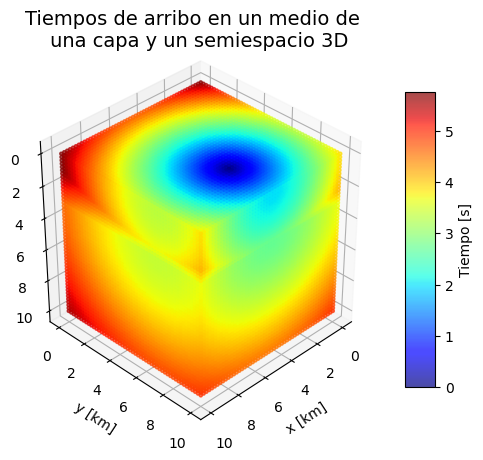

In [11]:
# Gráfica
fig = plt.figure(1)
ax = plt.axes(projection="3d")
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')
ax.set_title('Tiempos de arribo en un medio de \n una capa y un semiespacio 3D',fontsize=14)
ax.invert_zaxis()
ax.view_init(elev=35, azim=45) 
ax.set_box_aspect([L_x,L_y,P_z])
cs=ax.scatter3D(X, Y, Z, c=T, alpha=0.7, marker='.', cmap='jet')
fig.colorbar(cs, shrink=0.8, aspect=10, label='Tiempo [s]')
plt.savefig('GrafMed1CapaySemiesp3D.png')
plt.show()

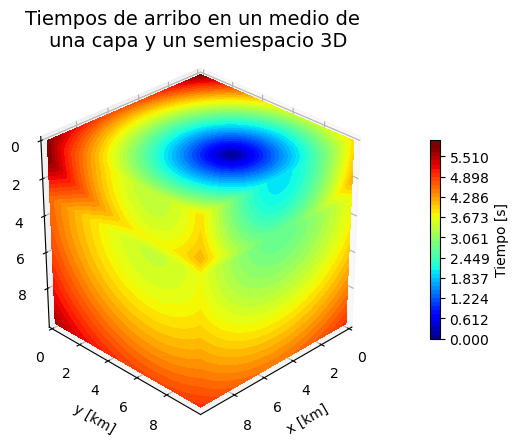

In [12]:
# Gráfica de todos los puntos con contourf

kw = {
    'vmin': 0,
    'vmax': T.max(),
    'levels': np.linspace(0, int(T.max()+1), 50),
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')

ax.set_xticks(list(range(0,L_x,int(L_x/5))))
ax.set_yticks(list(range(0,L_y,int(L_y/5))))
ax.set_zticks(list(range(0,P_z,int(P_z/5))))

ax.axes.set_xlim3d(left=0, right=L_x) 
ax.axes.set_ylim3d(bottom=0, top=L_y) 
ax.axes.set_zlim3d(bottom=0, top=P_z) 

ax.invert_zaxis()

ax.view_init(elev=30, azim=45) 
ax.set_box_aspect([L_x,L_y,P_z])
ax.set_title('Tiempos de arribo en un medio de \n una capa y un semiespacio 3D',fontsize=14)

_ = ax.contourf(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet')
_ = ax.contourf(X[0, :, :], T[-1, :, :], Z[0, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet')
C = ax.contourf(T[:, -1, :], Y[:, 0, :], Z[:, 0, :], zdir='x', offset=X.max(), **kw, cmap='jet')

fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Tiempo [s]') 
plt.savefig('GrafMed1CapaySemiesp3D_CF.png')
plt.show()

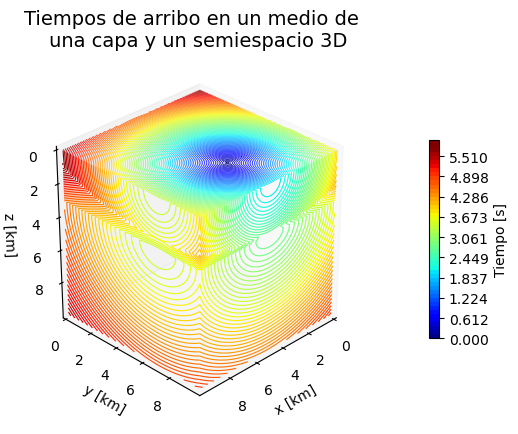

In [13]:
# Gráfica de los contornos con contour

kw = {
    'vmin': 0,
    'vmax': T.max(),
    'levels': np.linspace(0, int(T.max()+1), 100),
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')

ax.set_xticks(list(range(0,L_x,int(L_x/5))))
ax.set_yticks(list(range(0,L_y,int(L_y/5))))
ax.set_zticks(list(range(0,P_z,int(P_z/5))))

ax.axes.set_xlim3d(left=0, right=L_x) 
ax.axes.set_ylim3d(bottom=0, top=L_y) 
ax.axes.set_zlim3d(bottom=0, top=P_z) 

ax.invert_zaxis()

ax.view_init(elev=30, azim=45) 
ax.set_box_aspect([L_x,L_y,P_z], zoom=0.9)
ax.set_title('Tiempos de arribo en un medio de \n una capa y un semiespacio 3D',fontsize=14)

_ = ax.contour(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet',linewidths=0.5)
_ = ax.contour(X[0, :, :], T[-1, :, :], Z[0, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet',linewidths=0.8)
Cc = ax.contour(T[:, -1, :], Y[:, 0, :], Z[:, 0, :], zdir='x', offset=X.max(), **kw, cmap='jet',linewidths=0.8)

fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Tiempo [s]') 
ax.grid(visible=None)
plt.savefig('GrafMed1CapaySemiesp3D_C.png')
plt.show()

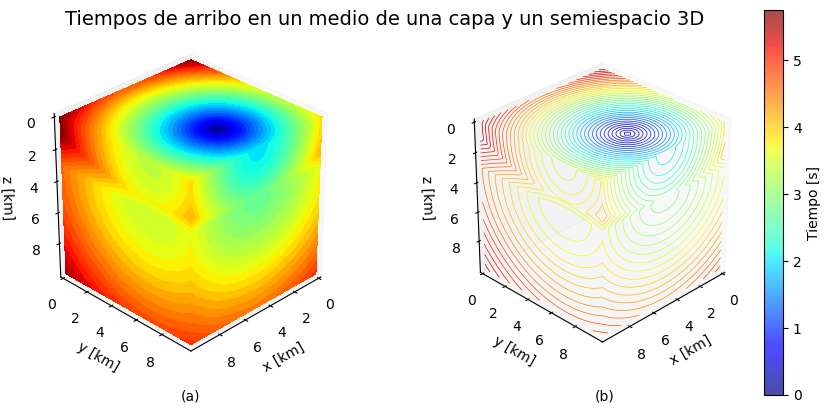

In [14]:
fig1=plt.figure(1, figsize=(10,5))

kw = {
    'vmin': 0,
    'vmax': T.max(),
    'levels': np.linspace(0, T.max(), 40),
}


ax = fig1.add_subplot(121, projection='3d')
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')

ax.set_xticks(list(range(0,L_x,int(L_x/5))))
ax.set_yticks(list(range(0,L_y,int(L_y/5))))
ax.set_zticks(list(range(0,P_z,int(P_z/5))))

ax.axes.set_xlim3d(left=0, right=L_x) 
ax.axes.set_ylim3d(bottom=0, top=L_y) 
ax.axes.set_zlim3d(bottom=0, top=P_z) 

ax.invert_zaxis()

ax.view_init(elev=30, azim=45) 
ax.set_box_aspect([L_x,L_y,P_z], zoom=0.9)
ax.grid(visible=None)

_ = ax.contourf(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet')
_ = ax.contourf(X[-1, :, :], T[-1, :, :], Z[-1, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet')
C = ax.contourf(T[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw, cmap='jet')

bx = fig1.add_subplot(122, projection='3d')

bx.set_xlabel('x [km]')
bx.set_ylabel('y [km]')
bx.set_zlabel('z [km]')

bx.set_xticks(list(range(0,L_x,int(L_x/5))))
bx.set_yticks(list(range(0,L_y,int(L_y/5))))
bx.set_zticks(list(range(0,P_z,int(P_z/5))))

bx.axes.set_xlim3d(left=0, right=L_x) 
bx.axes.set_ylim3d(bottom=0, top=L_y) 
bx.axes.set_zlim3d(bottom=0, top=P_z) 

bx.invert_zaxis()
bx.view_init(elev=30, azim=45) 
bx.set_box_aspect([L_x,L_y,P_z], zoom=0.9)
bx.grid(visible=None)

_ = bx.contour(X[:, :, 0], Y[:, :, 0], T[:, :, 0], zdir='z', offset=0, **kw, cmap='jet',linewidths=0.5)
_ = bx.contour(X[-1, :, :], T[-1, :, :], Z[-1, :, :], zdir='y', offset=Y.max(), **kw, cmap='jet',linewidths=0.5)
Cc = bx.contour(T[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw, cmap='jet',linewidths=0.5)


fig1.colorbar(cs, ax=bx, fraction=0.06, pad=0.001, label='Tiempo [s]') 

plt.figtext(0.306, 0.1, "(a)", ha="center", fontsize=10)
plt.figtext(0.72, 0.1, "(b)", ha="center", fontsize=10)
plt.figtext(0.5, 0.85, 'Tiempos de arribo en un medio de una capa y un semiespacio 3D', ha="center", fontsize=14)
#plt.title('Tiempos de arribo en un medio homogeneo 3D',fontsize=14)
plt.savefig('GrafMed1CapaySemiesp3D.png')
plt.show()

In [15]:
# Que pasaría si la fuente se encuentra en el semi-espacio?